# Définition du modèle


---


Notre objectif est de modéliser la croissance d'une population de tiques, à leurs différents stades de développement et selon leur statut d'infection à à la *Borrelia burgdorferi*, bactérie responsable de la maladie de Lyme, en fonction du temps et des facteurs biotiques et abiotiques. Le facteur biotique que nous avons considéré est le parasitisme, qui est la relation interspécifique contribuant à la transmission du pathogène de la maladie de Lyme.

Pour ce faire, nous utiliserons un modèle de population structurée à temps continu.

La tique possède quatre stades de développement: oeuf, larve, nymphe et adulte. Toutefois, dans notre modèle, nous allons omettre le stade oeuf et supposer que tous les oeufs deviennent des larves. De plus, nous supposerons que les larves ne peuvent pas être infectées par la *Borrelia burgdorferi*. Notre population de tiques sera donc divisée en 5 classes, soient les larves, les nymphes (infectées ou non infectées) et les adultes (infectés ou non infectés).

Soit $x_i(t)$ la densité de tiques appartenant à la $i$e classe au temps $t$. Plus spécifiquement:
\begin{align*}
  &x_1(t) = \text{Nombre de larves au temps } t \\
  &x_2(t) = \text{Nombre de nymphes infectées au temps } t \\
  &x_3(t) = \text{Nombre de nymphes non infectées au temps } t \\
  &x_4(t) = \text{Nombre d'adultes infectés au temps } t \\
  &x_5(t) = \text{Nombre d'adultes non infectés au temps } t \\
\end{align*}

Soient $b_i$ et $d_i$ le taux de naissance et de mort de la classe $i$. Dans notre modèle, nous supposerons que seules les tiques adultes peuvent se reproduire, c'est-à-dire que $b_1,b_2,b_3=0$ et $b_4,b_5>0$.

Soit également $m_{i,j}$, le taux de migrations des individus de la classe $i$ vers la classe $j$. Dans notre modèle, nous supposerons que les tiques peuvent migrer uniquement vers leur prochain stade de développement et que les tiques non infectées peuvent devenir infectées, mais pas l'inverse. En d'autres termes, $m_{1,2},m_{1,3},m_{2,4},m_{3,4},m_{3,5} > 0$ et les autres taux de migration sont nuls.

Nous pouvons représenter ce modèle par le diagramme de phases suivant:

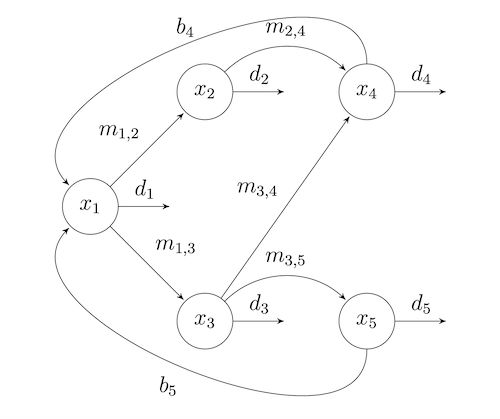

À présent, nous pouvons modéliser la croissance de la population de tiques par un système d'équations différentielles ordinaires:
\begin{align*}
  &\frac{dx_1(t)}{dt}=b_4x_4(t)+b_5x_5(t)-(d_1+m_{1,2}+m_{1,3})x_1(t) \\
  &\frac{dx_2(t)}{dt}=m_{1,2}x_1(t)-(d_2+m_{2,4})x_2(t) \\
  &\frac{dx_3(t)}{dt}=m_{1,3}x_1(t)-(d_3+m_{3,4}+m_{3,5})x_3(t) \\
  &\frac{dx_4(t)}{dt}=m_{2,4}x_2(t)+m_{3,4}x_3(t)-d_4x_4(t) \\
  &\frac{dx_5(t)}{dt}=m_{3,5}x_3(t)-d_5x_5(t)
\end{align*}

Ce système d'EDO peut être représenté sous forme matricielle par:
$$\frac{d\mathbf{x}(t)}{dt}=\mathbf{Ax}(t)$$ où
\begin{align*}
  &\mathbf{x}(t)=(x_1(t),x_2(t),x_3(t),x_4(t),x_5(t))^T, \\
  &\mathbf{A}=
  \begin{pmatrix}
    -(d_1+m_{1,2}+m_{1,3}) & 0 & 0 & b_4 & b_5 \\
    m_{1,2} & -(d_2+m_{2,4}) & 0 & 0 & 0 \\
    m_{1,3} & 0 & -(d_3+m_{3,4}+m_{3,5}) & 0 & 0 \\
    0 & m_{2,4} & m_{3,4} & -d_4 & 0 \\
    0 & 0 & m_{3,5} & 0 & -d_5
  \end{pmatrix}
\end{align*}

# Définition des paramètres et de leurs unités

Maintenant que la structure du modèle est bien définie, il reste à déterminer les différents paramètres du modèle ainsi que leurs unités en émettant des hypothèses et en se basant sur la littérature. Nous considèrerons que le temps est donné en année.

La littérature suggère que seules les tiques adultes vont se servir du cerf comme hôte principal, les nymphes et les larves préférant les oiseaux et les petits mammifères (citer van Buski). Dès lors, nous supposerons que la population de cerfs a un effet uniquement sur les paramètres des tiques adultes. Afin de simplifier le modèle, nous supposerons que seul le taux de fécondité des tiques adultes sera affecté par la population de cerfs.

De plus, nous supposerons que les tiques ont toujours un hôte duquel se nourrir. Ceci nous permettra de définir leur taux de mortalité et leur taux de migration vers le stade suivant comme des contstantes indépendantes des populations d'hôtes.

Les tiques deviennent infectées à la *Borrelia burgdorferi* lorsqu'elles se nourissent d'un hôte infecté. Les tiques gardent le même hôte lorsqu'elles sont dans un stade du cycle de vie, mais changent d'hôte entre les différents stades. Les tiques ne peuvent donc que changer leur statut d'infection lorsqu'elles évoluent vers leur prochain stade. En nous basant sur les données de l'INSPQ, nous utiliserons la proportion de tiques soumises à la surveillance en Montérégie (où est situé le parc Michel-Chartrand) infectées et non infectée pour déterminer la probabilité qu'une tique passe du statut non infectée à infectée lors de son changement de stade:
$$\mathbb{P}[I]=\frac{tiques \ infectées}{tiques \ non \ infectées} \approx 0.27$$
Par un raisonnement analogue, la probabilité de demeurer non infecté lors d'un changement de stade est donnée par:
  $$1-\mathbb{P}[I]=\frac{tiques \ infectées}{tiques \ non \ infectées} \approx 0.73$$


Le cycle de vie de la tique dure environ deux ans.

### Stade larval
Par soucis de simplicité, nous supposerons que le stade larval commence au moment où un oeuf est pondu et dure jusqu'à la mue vers le stade nymphal. La tique adulte pond généralement ses oeufs au printemps, puis ceux-ci éclosent vers la fin de l'été. La larve quête un hôte pendant 3-4 mois, puis entre dans une période de latence jusqu'au prochain printemps où elle mue en nymphe. La période à l'état de larve s'étale donc sur 1 an et le taux de migration du stade larval au stade nymphal est donné par $1 \frac{nymphe/année}{larve}$.

En utilisant les probabilités de devenir infecté ou de demeurer non infecté calculées précédemment, le taux de migration du stade larval au stade nymphal infecté est donné par:

$$m_{1,2}=1 \frac{nymphe/année}{larve} \mathbb{P}[I]=0.27 \frac{nymphe/année}{larve}$$

et le taux de migration du stade larval au stade nymphal non infecté est donné par:

$$m_{1,3}=1 \frac{nymphe/année}{larve} (1-\mathbb{P}[I])=0.73 \frac{nymphe/année}{larve}$$

La [littérature suggère](https://www.researchgate.net/publication/45406893_Persistence_of_Pathogens_with_Short_Infectious_Periods_in_Seasonal_Tick_Populations_The_Relative_Importance_of_Three_Transmission_Routes) que nous pouvons approximer le taux de mortalité quotidien par capita de la tique nourrie, au stade larval, par $-\log((1-0.00208)^{30}) \approx \frac{0.0271}{jour}$. Dès lors, le taux de mortalité annuel est donné par:

$$d_1 =\frac{0.0271}{jour} \cdot 365\frac{jours}{année}\approx \frac{9.9}{année}$$

### Stade nymphal
Après avoir émergé au printemps, les nymphes vont chercher un hôte pendant 3-4 mois, puis vont muer en adulte en automne. La période au stade nymphal s'étale donc sur environ 6 mois du printemps à l'automne et le taux de migration du stade nymphal au stade adulte est donné par $1 \frac{adulte/nymphe}{année}$ si on prend compte des saisons.

Étant donné que nous avons supposé que les tiques infectées demeurent infectées, nous avons:

$$m_{2,4}=1 \frac{adulte/année}{nymphe}$$

En utilisant les probabilités de devenir infecté ou de demeurer non infecté de façon analogue au stade larval, on obtient que:

\begin{align*}
  m_{3,4}=0.27 \frac{adulte/année}{nymphe} \\
  m_{3,5}=0.73 \frac{adulte/année}{nymphe}
\end{align*}

La littérature suggère que nous pouvons approximer le taux de mortalité quotidien par capita de la tique nourrie, au stade nymphal, par $-\log((1-0.0007)^{30}) \approx \frac{0.0091}{jour}$. Dès lors, les taux de mortalité annuels sont donnés par:

$$d_2 = d_3 = \frac{0.0091}{jour} \cdot 365\frac{jours}{année}\approx \frac{3.33}{année}$$

### Stade adulte
Après avoir émergé en automne, les adultes vont chercher un hôte pendant 3-4 mois, entre ensuite dans une période de latence, puis vont pondre leur oeufs au printemps. La littérature suggère qu'une femelle pond environ 3000 oeufs, qui ont un taux de survie au stade larval de 0.4. Étant donné que nous n'avons pas séparée notre population en mâle et femelle, nous supposerons que chaque tique pond 3000 oeufs. Comme mentionné précédemment, le taux de fécondité des tiques adultes dépendra de la population de cerfs. Plus spécifiquement, celui-ci sera proportionnelle à la probabilité qu'une tique adulte trouve un cerf comme hôte ($H$). Nous supposerons que cette probabilité est donnée par:

$$\mathbb{P}[H] = 1-e^{-x}$$

où $x$ correspond à la densité de cerfs par hectare. Dès lors, pour une densité de cerfs $x$ donnée, les taux de fécondité de notre modèle sont:

$$b_4 = b_5 = 0.4 \cdot 3000 \frac{larves/adultes}{années} \mathbb{P}[H] = 1200 \frac{larves/adultes}{années} (1-e^{-x})$$



La littérature suggère que nous pouvons approximer le taux de mortalité quotidien par capita de la tique nourrie, au stade adulte, par $-\log((1-0.0006)^{30}) \approx \frac{0.0078}{jour}$. Dès lors, les taux de mortalité annuels sont donnés par:

$$d_4 = d_5 \frac{0.0078}{jour} \cdot 365\frac{jours}{année}\approx \frac{2.85}{année}$$

# Résolution du système

---

À présent, trouvons la solution de ce système à l'aide de la fonction `odeint` du module `scipy.integrate`.

In [ ]:
# Importation et installation de packages utiles pour la suite...
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math

L'implémentation qui suit permet de modéliser le système lorsque la matrice $\mathbf{A}$ possède des éléments constants. On peut tout de même moduler ceux-ci et vérifier la solution du système pour différentes valeurs de ces éléments, mais ceux-ci doivent demeurer constants par rapport au temps.

In [ ]:
#retourne les valeurs numérique de notre modélisation pour une densité de cerfs donnée
def valeurs(x):
  #définition de A
  m12 = 0.27
  m13 = (1-0.27)
  d1 = 9.9

  m24 = 1
  d2 = 3.33

  m34 = 0.27
  m35 = (1-0.27)
  d3 = 3.33

  b4 = 0.4*3000*(1-math.exp(-x))
  d4 = 2.85

  b5 = 0.4*3000*(1-math.exp(-x))
  d5 = 2.85

  A = np.array([[-(d1+m12+m13),0,0,b4,b5],
                [m12,-(d2+m24),0,0,0],
                [m13,0,-(d3+m34+m35),0,0],
                [0,m24,m34,-d4,0],
                [0,0,m35,0,-d5]])

  #fonction qui retourne dx/dt
  def model(x,t):
    return np.matmul(A,x)

  #conditions initiales
  x0 = np.array([300000,81000,219000,81000,219000])

  #points de temps
  t = np.linspace(0,2,1000)

  #initialisation du tableau des valeurs du vecteur x(t)
  x = np.array([np.zeros(5) for i in range(100)])

  #Résolution de l'EDO
  x = odeint(model, x0, t)

  return (t,x)

In [ ]:
#affichage des courbes de la population
def affichage(t,x):
  plt.plot(t,x[:,0])
  plt.plot(t,x[:,1])
  plt.plot(t,x[:,2])
  plt.plot(t,x[:,3])
  plt.plot(t,x[:,4])
  plt.legend(['larves','nymphes infectées','nymphes non infectée','adultes infectés','adultes non infectés'])
  plt.xlabel('années')
  plt.ylabel('nombre de tiques')
  plt.show()


# Résultat

En supposant que nous avons une population initiale de 300000 larves, 81000 nymphes infectées, 219000 nymphes non infectées, 81000 tiques adultes infectées et 219000 tiques adultes non infectées, voici l'évolution de la population de tiques sur 2 ans, étant donné différents nombres de cerfs au parc Michel-Chartrand.

Dynamique des populations lorsque le nombre de cerfs au parc Michel-Chartrand est de 32, pour une superficie de 185 hectares.

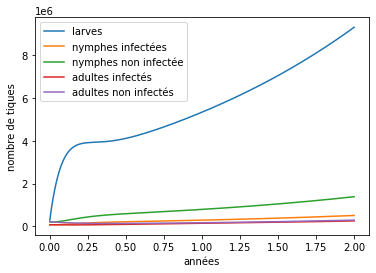

Population finale après 2.0 ans:
Larves: 9296708.484012684
Nymphes infectées: 513773.02177683025
Nymphes non infectées: 1389090.0218410592
Adultes infectées: 260788.84125822902
Adultes non infectées: 297949.5195008715


In [ ]:
z = valeurs(32/185)
affichage(z[0],z[1])
print("Population finale après",z[0][999], "ans:")
print("Larves:", z[1][999][0])
print("Nymphes infectées:", z[1][999][1])
print("Nymphes non infectées:", z[1][999][2])
print("Adultes infectées:", z[1][999][3])
print("Adultes non infectées:", z[1][999][4])


Dynamique des populations lorsque le nombre de cerfs au parc Michel-Chartrand est de 17, pour une superficie de 185 hectares.

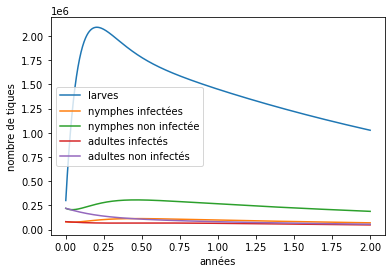

Population finale après 2.0 ans:
Larves: 1025854.6523777097
Nymphes infectées: 69507.85174877815
Nymphes non infectées: 187928.63620965942
Adultes infectées: 47807.773933497345
Adultes non infectées: 54965.98128941585


In [ ]:
z = valeurs(17/185)
affichage(z[0],z[1])
print("Population finale après",z[0][999], "ans:")
print("Larves:", z[1][999][0])
print("Nymphes infectées:", z[1][999][1])
print("Nymphes non infectées:", z[1][999][2])
print("Adultes infectées:", z[1][999][3])
print("Adultes non infectées:", z[1][999][4])

Remarquons que dans les deux scénarios précédent, la population est en voie d'extinction, bien que cette extinction soit beaucoup plus rapide lorsque le parc Michel-Chartrand contient 17 cerfs au lieu de 32.

Étant donné que ce sont les nymphes infectées qui posent un danger d'infection de la maladie de Lyme à l'être humain, traçons la courbe de cette population en fonction de différents scénarios concernant la population de cerfs dans le parc Michel-Chartrand.


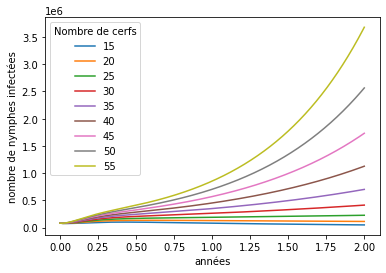

In [ ]:
nbCerfs = [15,20,25,30,35,40,45,50,55]
y = []
for i in nbCerfs:
  z = valeurs(i/185)
  plt.plot(z[0],z[1][:,1])
  y.append(z[1][999,1])

plt.legend(nbCerfs,title="Nombre de cerfs")
plt.xlabel('années')
plt.ylabel('nombre de nymphes infectées')
plt.show()

Remarquons que le seuil critique pour que la population s'éteigne est d'environ 25 cerfs...

À présent, dans le but de comprendre la relation entre le nombre de cerfs et le nombre de tiques infectées au stade nymphal après 2 ans, tentons de déterminer si une corrélation existe entre ces deux variables.

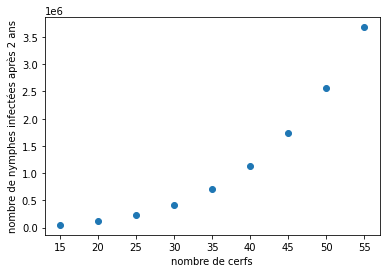

In [ ]:
plt.scatter(nbCerfs,y)
plt.xlabel('nombre de cerfs')
plt.ylabel('nombre de nymphes infectées après 2 ans')
plt.show()

Nous pouvons observer que la relation entre les deux variables est exponentielle. Afin de transformer cette relation non-linéaire en une relation linéaire qui nous permettra de tracer une droite de corrélation, appliquons le logarithme aux données de tiques infectées au stade nymphal après 2 ans. Ensuite, le calcul du coefficient (de Pearson) de corrélation pourra être effectué et on pourra tracer la droite de régression linéaire.

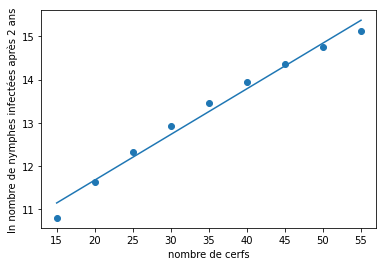

coefficient de corrélation: 0.9906804636356388


In [ ]:
z = np.log(y)
m, b = np.polyfit(nbCerfs, z, 1)
corr = np.corrcoef(nbCerfs,z)
plt.scatter(nbCerfs,z)
plt.plot(nbCerfs, m*np.array(nbCerfs)+b)
plt.xlabel('nombre de cerfs')
plt.ylabel('ln nombre de nymphes infectées après 2 ans')
plt.show()
print("coefficient de corrélation:", corr[0][1])

Nous remarquons une corrélation positive presque parfaite entre les deux variables.

---


À présent, essayons de modéliser le scénario où la ville de Longueuil abbaterait 15 des 32 cerfs du parc Michel-Chartrand. Pour ce faire, nous utiliserons le même système que précédemment, à la différence que nous simuleront l'évolution de la population de tiques sur 4 ans. Nous commencerons le modèle avec 32 cerfs, puis nous changeront le nombre de cerfs à 17 à la moitié de l'intervalle de temps, c'est-à-dire après 2 ans.

In [ ]:
#retourne les valeurs numérique de notre modélisation pour une densité de cerfs donnée
def valeurs(x1,x2):
  #fonction qui retourne dx/dt
  def model(x,t):
    #définition de A
    m12 = 0.27
    m13 = (1-0.27)
    d1 = 9.9

    m24 = 1
    d2 = 3.33

    m34 = 0.27
    m35 = (1-0.27)
    d3 = 3.33

    if t<2:
      b4 = 0.4*3000*(1-math.exp(-x1))
      b5 = 0.4*3000*(1-math.exp(-x2))
    else:
      b4 = 0.4*3000*(1-math.exp(-x2))
      b5 = 0.4*3000*(1-math.exp(-x2))
    
    d4 = 2.85
    d5 = 2.85

    A = np.array([[-(d1+m12+m13),0,0,b4,b5],
                  [m12,-(d2+m24),0,0,0],
                  [m13,0,-(d3+m34+m35),0,0],
                  [0,m24,m34,-d4,0],
                  [0,0,m35,0,-d5]])

    return np.matmul(A,x)

  #conditions initiales
  x0 = np.array([300000,81000,219000,81000,219000])

  #points de temps
  t = np.linspace(0,4,1000)

  #initialisation du tableau des valeurs du vecteur x(t)
  x = np.array([np.zeros(5) for i in range(100)])

  #Résolution de l'EDO
  x = odeint(model, x0, t)

  return (t,x)

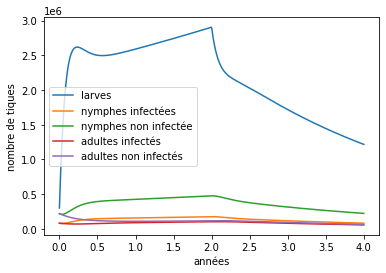

Population finale après 4.0 ans:
Larves: 1216273.6459679406
Nymphes infectées: 82409.86965919458
Nymphes non infectées: 222811.86981930386
Adultes infectées: 56915.749667887154
Adultes non infectées: 64934.842582969875


In [ ]:
z = valeurs(32/185,17/185)
affichage(z[0],z[1])
print("Population finale après",z[0][999], "ans:")
print("Larves:", z[1][999][0])
print("Nymphes infectées:", z[1][999][1])
print("Nymphes non infectées:", z[1][999][2])
print("Adultes infectées:", z[1][999][3])
print("Adultes non infectées:", z[1][999][4])

Remarquons qu'à la première année, la population de tiques grandissait exponentiellement. Après l'abattage de 15 cerfs, on voit que la tendance de la population est à la baisse.

Calul des valeurs propres de la matrice $A$ (non utilisées):

In [ ]:
m12 = 0.27
m13 = (1-0.27)
d1 = 9.9

m24 = 1
d2 = 3.33

m34 = 0.27
m35 = (1-0.27)
d3 = 3.33

b4 = 0.4*3000*(1-math.exp(-17))
d4 = 2.85

b5 = 0.4*3000*(1-math.exp(-17))
d5 = 2.85

A = np.array([[-(d1+m12+m13),0,0,b4,b5],
              [m12,-(d2+m24),0,0,0],
              [m13,0,-(d3+m34+m35),0,0],
              [0,m24,m34,-d4,0],
              [0,0,m35,0,-d5]])

print(np.linalg.eig(A))

(array([-11.59071362+8.63227792j, -11.59071362-8.63227792j,
         5.10142723+0.j        ,  -2.85      +0.j        ,
        -4.33      +0.j        ]), array([[-9.97614835e-01+0.j        , -9.97614835e-01-0.j        ,
         9.96567891e-01+0.j        , -3.76884520e-15+0.j        ,
         1.96716899e-15+0.j        ],
       [ 1.53710013e-02+0.01827462j,  1.53710013e-02-0.01827462j,
         2.85294393e-02+0.j        , -3.48183283e-15+0.j        ,
        -6.34160189e-01+0.j        ],
       [ 4.15586333e-02+0.04940915j,  4.15586333e-02-0.04940915j,
         7.71351507e-02+0.j        ,  2.23613007e-15+0.j        ,
         6.34160189e-01+0.j        ],
       [ 2.68219010e-04-0.0033521j ,  2.68219010e-04+0.0033521j ,
         6.20717873e-03+0.j        , -7.07106781e-01+0.j        ,
         3.12795228e-01+0.j        ],
       [ 3.06002806e-04-0.00382431j,  3.06002806e-04+0.00382431j,
         7.08157898e-03+0.j        ,  7.07106781e-01+0.j        ,
        -3.12795228e-01+0.j       